In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [16]:
input_path = input("Enter with the input path: ")
output_path = input("Enter with the output path: ")

In [17]:
img = cv2.imread(input_path, 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

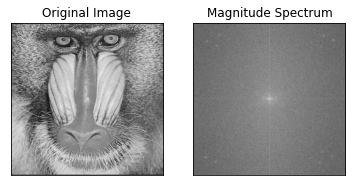

In [18]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
rows, cols = img.shape
center_x, center_y = rows // 2, cols // 2

In [20]:
r = int(input("Enter with the value of r: "))

fshift[center_x - r : center_x + r, center_y - r : center_y + r] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_back)

In [21]:
Image.fromarray(img_filtered).convert('L').save(output_path + '/high-pass-' + str(r) + '.png')